In [ ]:
#Table of Contents for 4.10 Coding Etiquette and Excel Reporting All Visuals
##Importing Data
##Creating crosstabs and analysis
##Creating Visualizations


In [1]:
#Importing data
##01 Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
##02 Defining "path" as a shortcut to the main Instacart folder on my desktop
path = r'/Users/emmawilcox/Desktop/InstacartGroceryBasketAnalysis'

In [3]:
##03 Importing InstacartGroceryBasketAnalysis as a dataframe, named "df_nolow_activity"
df_nolow_activity=pd.read_pickle(r'/Users/emmawilcox/Desktop/InstacartGroceryBasketAnalysis/Data/prepared data/allcolumnsforvisuals.pkl')

In [4]:
df_nolow_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28517248 entries, 0 to 32399731
Data columns (total 44 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   orders_day_of_week       int8    
 4   time_order_placed        int8    
 5   days_since_prior_order   float16 
 6   product_id               int64   
 7   add_to_cart_order        int8    
 8   reordered                int8    
 9   product_name             category
 10  aisle_id                 float16 
 11  department_id            float16 
 12  prices                   float64 
 13  price_range_loc          category
 14  busiest_days_column      category
 15  busiest_period_of_day    object  
 16  max_order                int64   
 17  loyalty_flag             category
 18  mean_order               float16 
 19  spending_level           category
 20  median_order_time     

In [5]:
crosstab_loyalty_time = pd.crosstab(df_nolow_activity['Time Ordering'], df_nolow_activity['loyalty_flag'], dropna = False)
crosstab_loyalty_time.to_clipboard()

In [97]:
#Creating crosstabs and analysis
##04 Creating crosstab of price ranges by department
crosstab_pricerange_department_id = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['price_range_loc'], dropna = False)

In [98]:
##05 Creating a crosstab of people's time of day ordering by department
crosstab_dept_time = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['Time Ordering'], dropna = False)

In [99]:
##06 Creating a crosstab of department ordering by region
crosstab_dept_region = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['Region'], dropna = False)

In [100]:
##07 Creating a crosstab of customers by how many orders they've placed, by region
crosstab_region_loyalty = pd.crosstab(df_nolow_activity['Region'], df_nolow_activity['loyalty_flag'], dropna = False)

In [101]:
##08 Creating a crosstab of customer spending levels by region
crosstab_region_spending = pd.crosstab(df_nolow_activity['Region'], df_nolow_activity['spending_level'], dropna = False)

In [102]:
##09 Creating a crosstab of customer demographics (income and whether they have children) by region
crosstab_region_Household_Kind_Budget = pd.crosstab(df_nolow_activity['Region'], df_nolow_activity['Household_Kind_Budget'], dropna = False)

In [103]:
##10 Creating a crosstab of customer demographics (income and marital status) by region
crosstab_region_Household_Status_Budget = pd.crosstab(df_nolow_activity['Region'], df_nolow_activity['Household_Status_Budget'], dropna = False)

In [104]:
##11 Creating a crosstab of customer lifestage (age)) by region
crosstab_region_age = pd.crosstab(df_nolow_activity['Region'], df_nolow_activity['Lifestage'], dropna = False)
crosstab_region_age.to_clipboard()

In [105]:
##12 Creating a crosstab of department order levels, by demographic (income and marital status)
crosstab_Household_Status_Budget_department_id = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['Household_Status_Budget'])

In [106]:
##13 Creating a crosstab of department order levels, by demographic (income and whether children are present)
crosstab_Household_Kind_Budget_department_id = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['Household_Kind_Budget'])

In [107]:
##14 Creating a crosstab of the levels of customer ordering across department
crosstab_frequency_of_customer_department_id = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['frequency_of_customer'], dropna = False)

In [108]:
##15 Creating a crosstab of the time of day that products are ordered, by department
crosstab_time_department_id = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['Time Ordering'], dropna = False)

In [109]:
##16 Creating a crosstab of the regions and price ranges
crosstab_price_range_loc_department_id = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['price_range_loc'], dropna = False)

In [110]:
##17 Creating a crosstab of how many orders customers have placed by how frequently they order
crosstab_frequency_loyalty = pd.crosstab(df_nolow_activity['frequency_of_customer'], df_nolow_activity['loyalty_flag'], dropna = False)

In [111]:
##18 Creating a crosstab of how many orders customers have placed, by region
crosstab_region_loyalty = pd.crosstab(df_nolow_activity['loyalty_flag'], df_nolow_activity['Region'], dropna = False)

In [112]:
##19 Creating a crosstab of customer age and marital status
crosstab_age_family_status = pd.crosstab(df_nolow_activity['Age'], df_nolow_activity['family_status'], dropna = False)

In [113]:
##20 Creating a crosstab of departments by age groups
crosstab_age_dept = pd.crosstab(df_nolow_activity['department_id'], df_nolow_activity['Lifestage'], dropna = False)

In [114]:
##21 Creating a crosstab of how many orders day of week by customer demographics (income and whether they have children)
crosstab_householdkind_dayofweek = pd.crosstab(df_nolow_activity['Household_Kind_Budget'], df_nolow_activity['orders_day_of_week'], dropna = False)

In [115]:
##22 Reviewing whether men or women have placed more orders
df_nolow_activity.groupby('Gender').agg({'max_order': ['mean']})

,max_order
,mean
Gender,
Female,35.299490
Male,35.010267


In [116]:
##23 Reviewing whether customers in different age groups pay more on average, per product
df_nolow_activity.groupby('Lifestage')['prices'].mean()

Lifestage
Mid Age Shopper    7.789771
Senior Shopper     7.791727
Youth Shopper      7.792589
Name: prices, dtype: float64

In [117]:
##24 Reviewing whether men or women pay more, on average, per product
df_nolow_activity.groupby('Gender').agg({'prices': ['mean']})

,prices
,mean
Gender,
Female,7.789149
Male,7.792748


In [241]:
crosstab_frequency_level = pd.crosstab(df_nolow_activity['frequency_of_customer'], df_nolow_activity['spending_level'], dropna = False)

In [242]:
crosstab_frequency_level.to_clipboard()

In [118]:
##25 Statistical review of whether some products are ordered at different times of day, on average
df_nolow_activity.groupby('department_id').agg({'median_order_time': ['mean']})

,median_order_time
,mean
department_id,
1.0,9.781250
2.0,9.234375
3.0,9.195312
4.0,9.031250
5.0,8.734375
6.0,9.445312
7.0,9.265625
8.0,9.906250


In [119]:
##26 Reviewing average orders, by department
df_nolow_activity.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1.0,16.523870
2.0,18.425264
3.0,18.231997
4.0,18.871471
5.0,16.518753
6.0,17.582849
7.0,18.259297
8.0,16.495813


In [120]:
##27 Using .groupby and .agg to get the average orders for each level of price range
df_nolow_activity.groupby('price_range_loc').agg({'order_number': ['mean']})

,order_number
,mean
price_range_loc,
High-range product,16.904067
Low-range product,18.173416
Mid-range product,18.240758


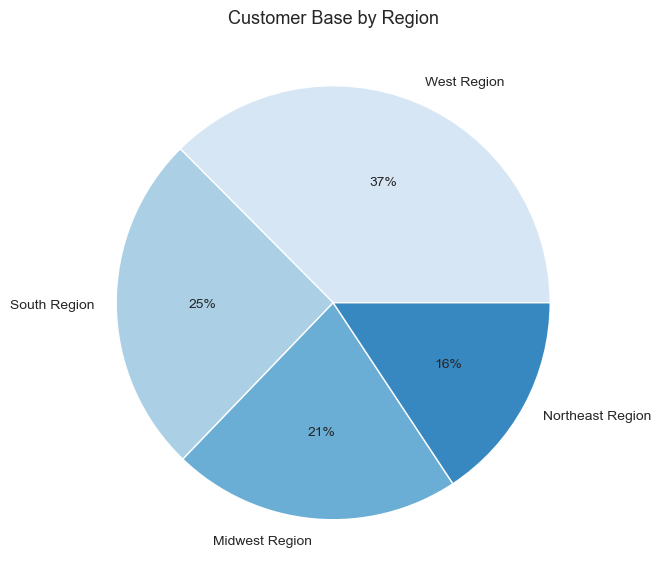

In [121]:
#Creating Visualizations
##28 Creating a pie chart of customer base percentage by region
regionpie = df_nolow_activity['Region'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Customer Base by Region',fontsize=13)
plt.show()

In [122]:
##29 Exporting viz
regionpie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionpie.png'))

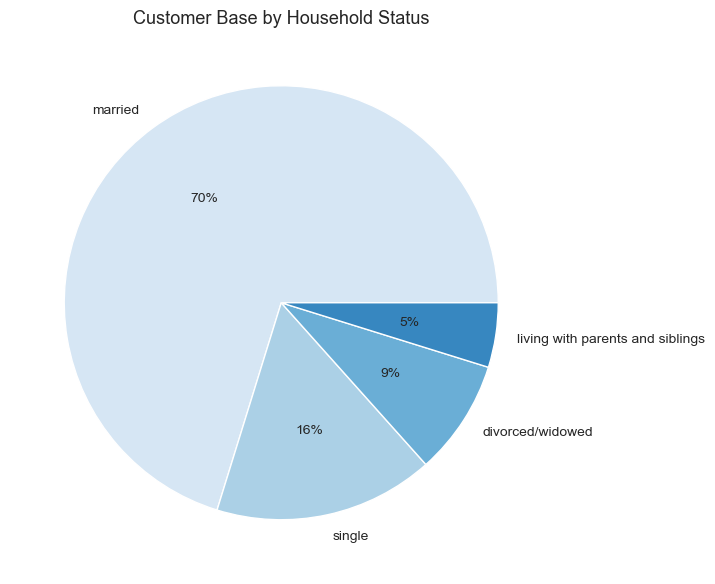

In [123]:
##30 Creating a pie chart of customer base percentage by marital status
familystatuspie = df_nolow_activity['family_status'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Customer Base by Household Status',fontsize=13)
plt.show()

In [124]:
##31 Exporting viz
familystatuspie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'familystatuspie.png'))

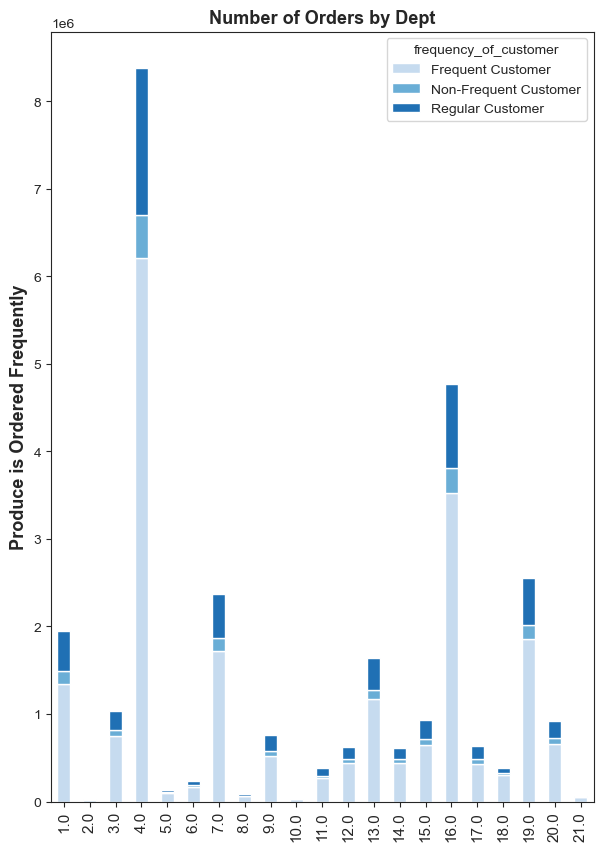

In [125]:
##32 Creating a stacked bar chart of how frequently customers order, by department
stackedbarfrequencydept = frequency_of_customer_department_id = crosstab_frequency_of_customer_department_id.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 3), figsize = (7,10))
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('Produce is Ordered Frequently', fontsize = 13, fontweight = 'bold')
plt.title('Number of Orders by Dept', fontsize = 13, fontweight = 'bold')
plt.show()

In [126]:
##33 Exporting viz
stackedbarfrequencydept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbarfrequencydept.png'))

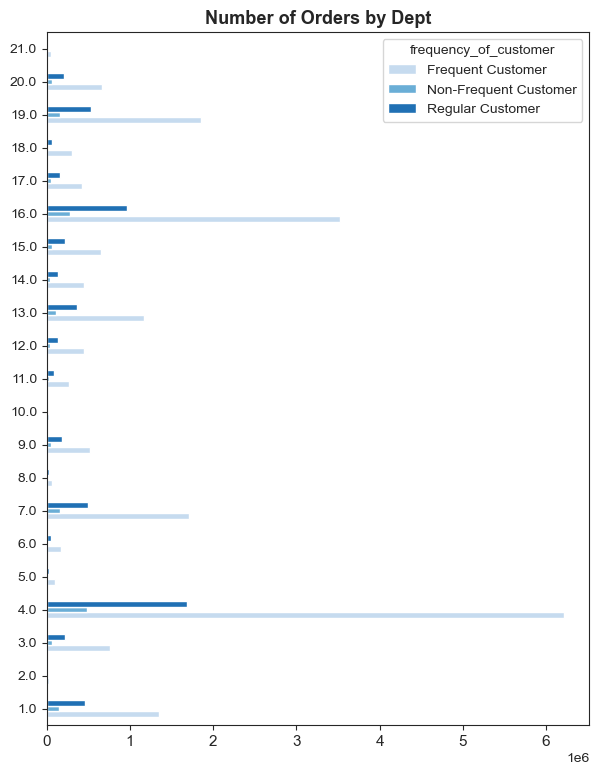

In [127]:
##34 Creating an unstacked bar chart of how frequently customers order, by department
unstackedbarfrequencydept = crosstab_frequency_of_customer_department_id.plot.barh (color = sns.color_palette('Blues', 3), figsize = (7,9))
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Number of Orders by Dept', fontsize = 13, fontweight = 'bold')
plt.show()

In [128]:
##35 Exporting viz
unstackedbarfrequencydept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unstackedbarfrequencydept.png'))

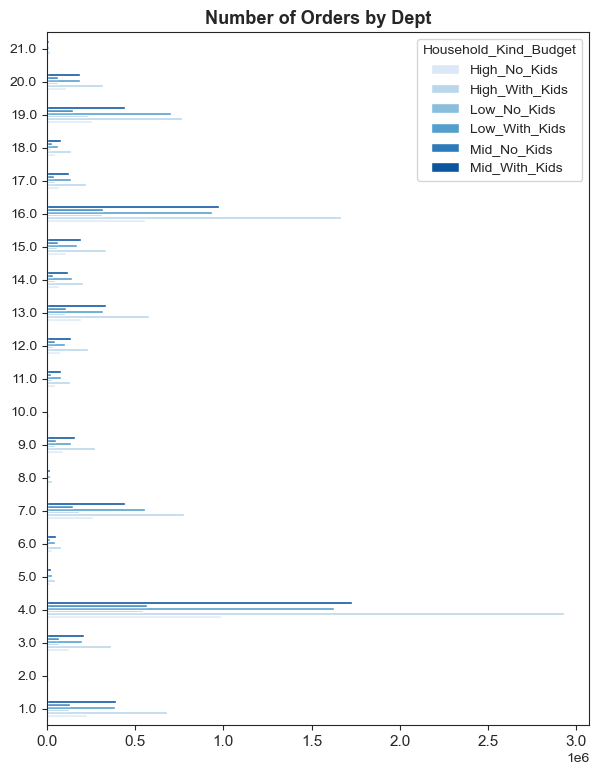

In [129]:
##36 Creating an unstacked bar chart of department orders, by customers depmographics (income and whether children are present)
unstackedhouseholdkinddept = crosstab_Household_Kind_Budget_department_id.plot.barh (color = sns.color_palette('Blues', 6), figsize = (7,9))
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Number of Orders by Dept', fontsize = 13, fontweight = 'bold')
plt.show()

In [130]:
##37 Exporting viz
unstackedhouseholdkinddept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unstackedhouseholdkinddept.png'))

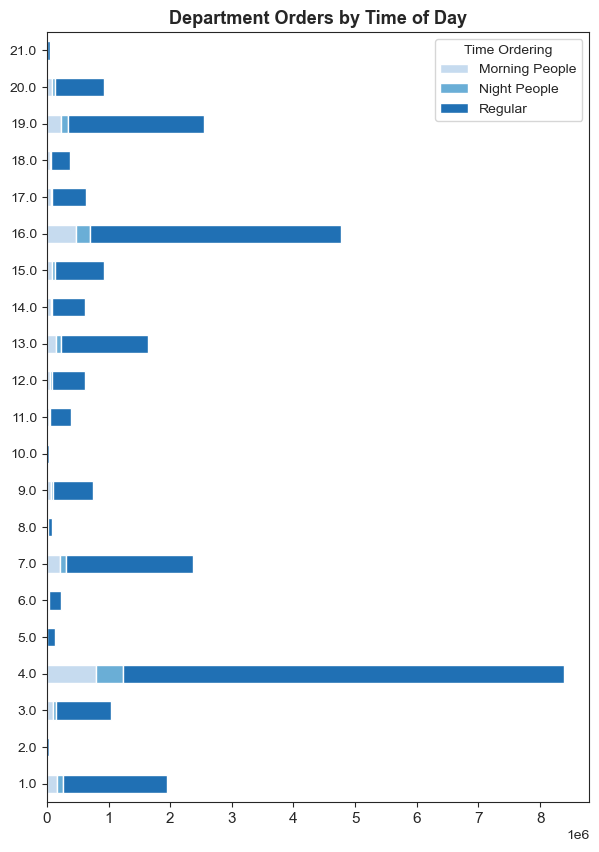

In [131]:
##38 Creating a stacked bar chart of department orders by time of day
stackedtime_department_id = crosstab_time_department_id.plot(kind = 'barh', stacked = True, color = sns.color_palette('Blues', 3), figsize = (7,10))
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Department Orders by Time of Day', fontsize = 13, fontweight = 'bold')
plt.show()

In [132]:
##39 Exporting viz
stackedtime_department_id.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedtime_department_id.png'))

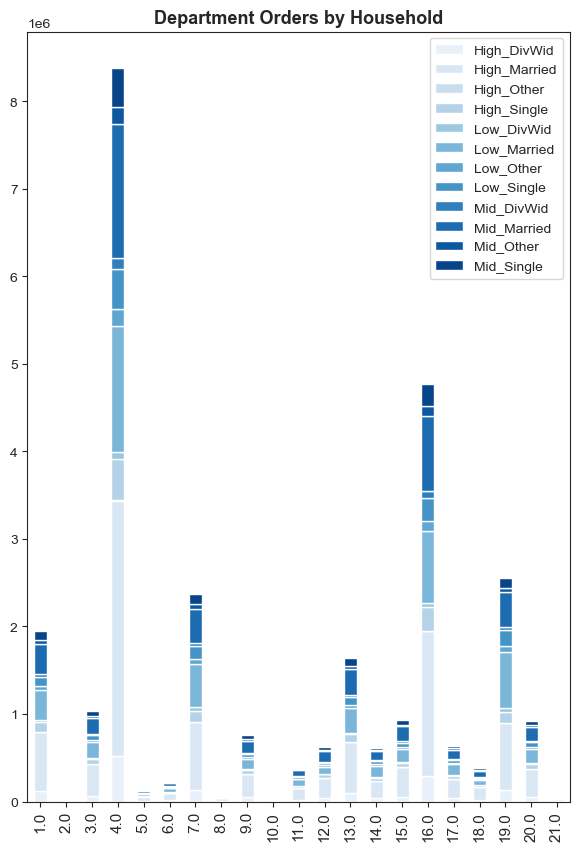

In [149]:
##40 Creating a stacked bar chart of department orders by customer demographic (income and marital status)
stackedHousehold_Status_Budget_department_id = crosstab_Household_Status_Budget_department_id.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 12), figsize = (7,10))
plt.legend(loc='upper right')
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Department Orders by Household', fontsize = 13, fontweight = 'bold')
plt.show()

In [150]:
##41 Exporting viz
stackedHousehold_Status_Budget_department_id.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedHousehold_Status_Budget_department_id.png'))

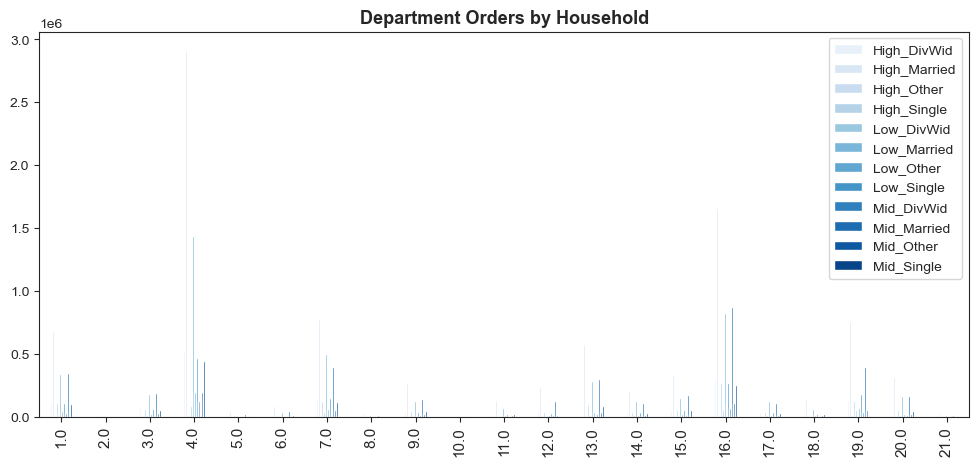

In [153]:
##42 Creating an unstacked bar chart of department orders by customer demographic (income and marital status)
unstackedHousehold_Status_Budget_department_id = crosstab_Household_Status_Budget_department_id.plot.bar (color = sns.color_palette('Blues', 12), figsize = (12,5))
plt.legend(loc='upper right')
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Department Orders by Household', fontsize = 13, fontweight = 'bold')
plt.show()

In [154]:
##43 Exporting viz
unstackedHousehold_Status_Budget_department_id.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unstackedHousehold_Status_Budget_department_id.png'))

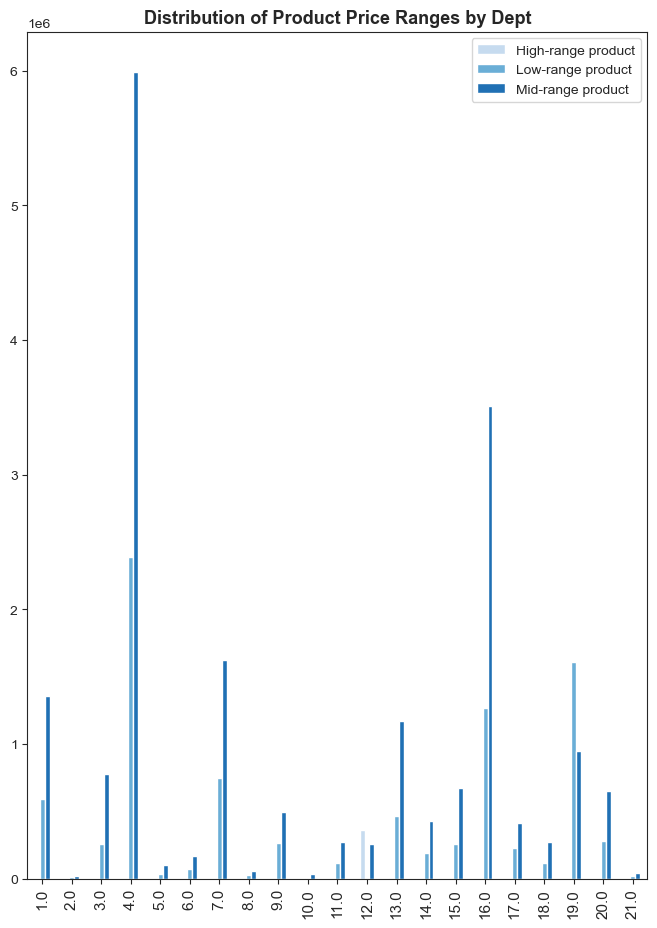

In [157]:
##44 Creating an unstacked bar chart of price ranges, by dept
unstackedprice_range_dept = crosstab_price_range_loc_department_id.plot(kind = 'bar', stacked = False, color = sns.color_palette('Blues', 3), figsize = (8,11))
plt.legend(loc='upper right')
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Distribution of Product Price Ranges by Dept', fontsize = 13, fontweight = 'bold')
plt.show()

In [158]:
##45 Exporting viz
unstackedprice_range_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unstackedprice_range_dept.png'))

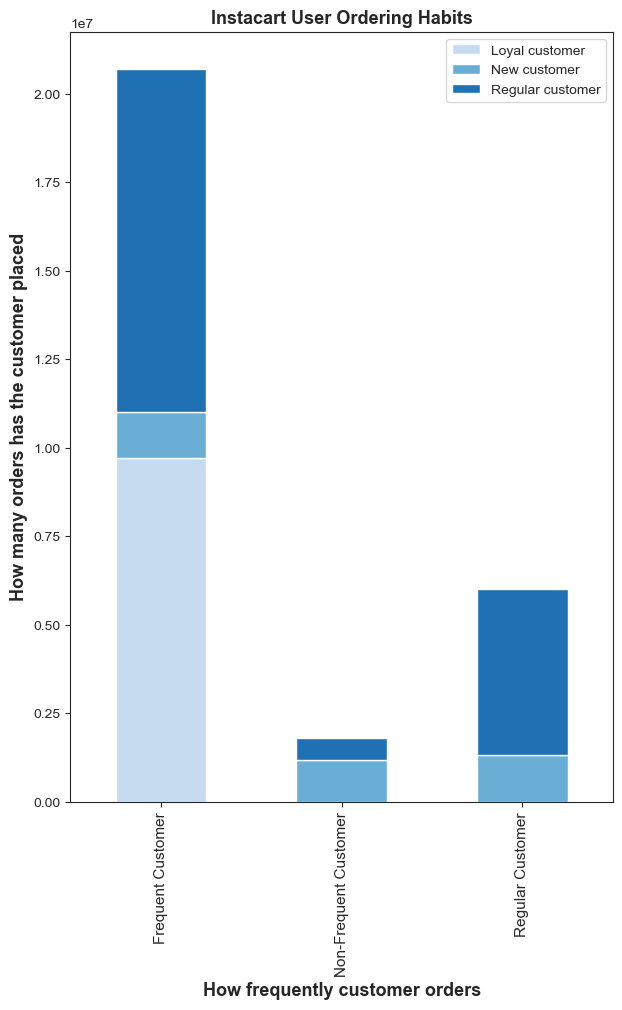

In [159]:
##46 Creating a stacked bar chart of how many orders customers have placed and how frequently they place orders
stackedfrequency_loyalty = crosstab_frequency_loyalty.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 3), figsize = (7,10))
plt.legend(loc='upper right')
plt.xlabel('How frequently customer orders', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('How many orders has the customer placed', fontsize = 13, fontweight = 'bold')
plt.title('Instacart User Ordering Habits', fontsize = 13, fontweight = 'bold')
plt.show()



In [160]:
##47 Exporting viz
stackedfrequency_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedfrequency_loyalty.png'))

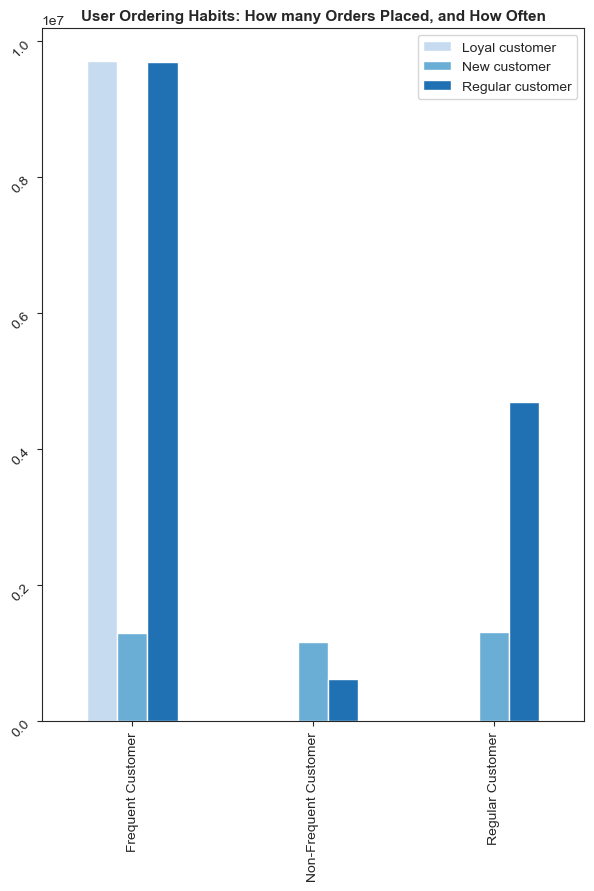

In [161]:
##48 Creating an unstacked bar chart of how many orders customers have placed and how frequently they place orders
unstackedFrequency_loyalty = crosstab_frequency_loyalty.plot.bar (color = sns.color_palette('Blues', 3), figsize = (7,9))
plt.legend(loc='upper right')
plt.xlabel('', fontsize = 11, fontweight = 'bold')
plt.yticks(rotation=45, ha="right")
plt.ylabel('', fontsize = 11, fontweight = 'bold')
plt.title('User Ordering Habits: How many Orders Placed, and How Often', fontsize = 11, fontweight = 'bold')
plt.show()


In [162]:
##49 Exporting viz
unstackedFrequency_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unstackedFrequency_loyalty.png'))

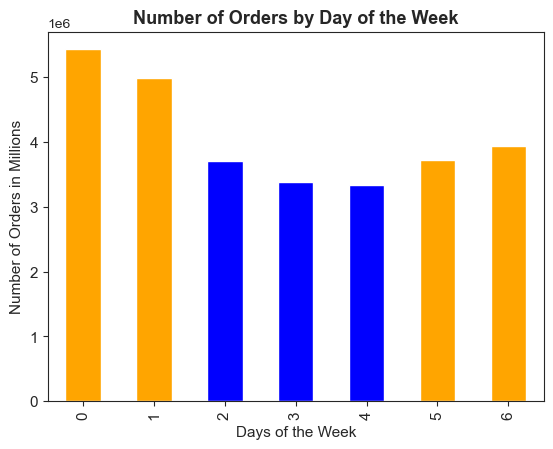

In [164]:
##50 Creating a bar chart of orders eaxh day of the week
barnumberordersbydayofweek = df_nolow_activity['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['orange', 'orange', 'blue', 'blue', 'blue', 'orange', 'orange'])
sns.set_style('ticks')
plt.xlabel('Days of the Week', fontsize = 11)
plt.ylabel('Number of Orders in Millions', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Number of Orders by Day of the Week', fontsize = 13, fontweight = 'bold')
plt.show()

In [165]:

##51 Exporting viz
barnumberordersbydayofweek.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barnumberordersbydayofweek.png'))

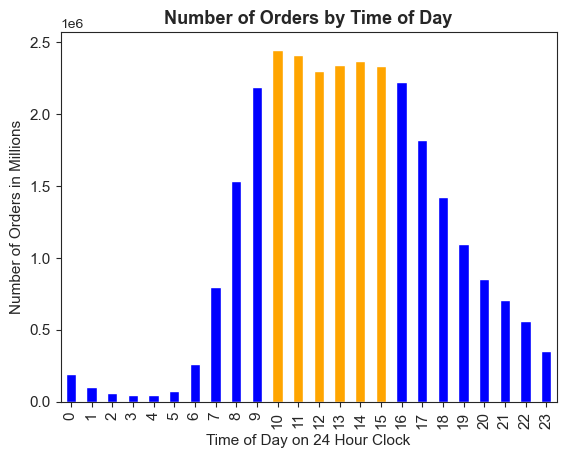

In [51]:
##52 Creating a bar chart of orders by time of day
barNumberofOrdersbyTimeofDay = df_nolow_activity['time_order_placed'].value_counts().sort_index().plot.bar(color =['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','orange','orange','orange','orange','orange','orange','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
sns.set_style('ticks')
plt.xlabel('Time of Day on 24 Hour Clock', fontsize = 11)
plt.ylabel('Number of Orders in Millions', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Number of Orders by Time of Day', fontsize = 13, fontweight = 'bold')
plt.show()

In [ ]:

##53 Exporting viz
barNumberofOrdersbyTimeofDay.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barNumberofOrdersbyTimeofDay.png'))

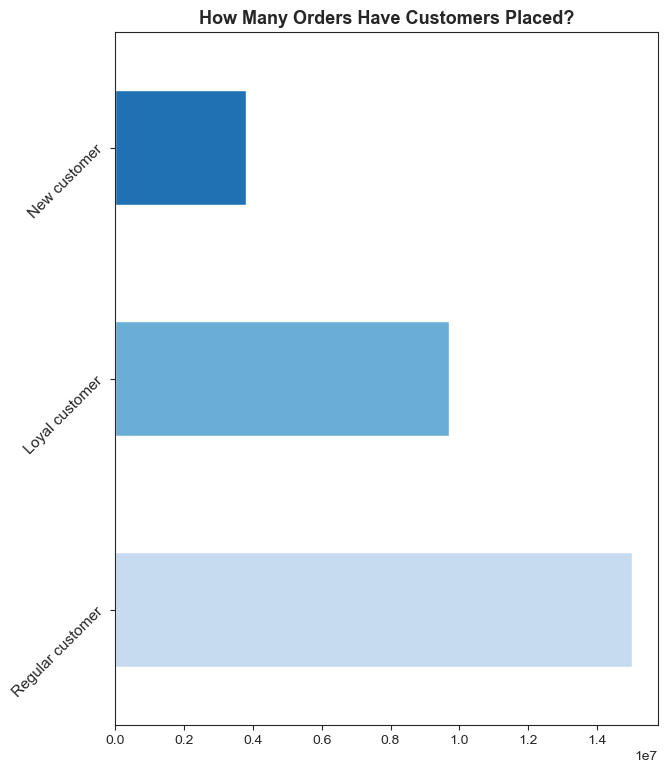

In [166]:
##54 Creating a bar chart of how many orders have customers have placed
barloyalty = df_nolow_activity['loyalty_flag'].value_counts().plot.barh(color = sns.color_palette('Blues', 3), figsize = (7,9))
sns.set_style('ticks')
plt.xlabel('', fontsize = 11)
plt.ylabel('', fontsize = 11)
plt.yticks(rotation=45, ha="right")
plt.yticks(fontsize = 11)
plt.title('How Many Orders Have Customers Placed?', fontsize = 13, fontweight = 'bold')
plt.show()

In [167]:
##55 Exporting viz
barloyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barloyalty.png'))

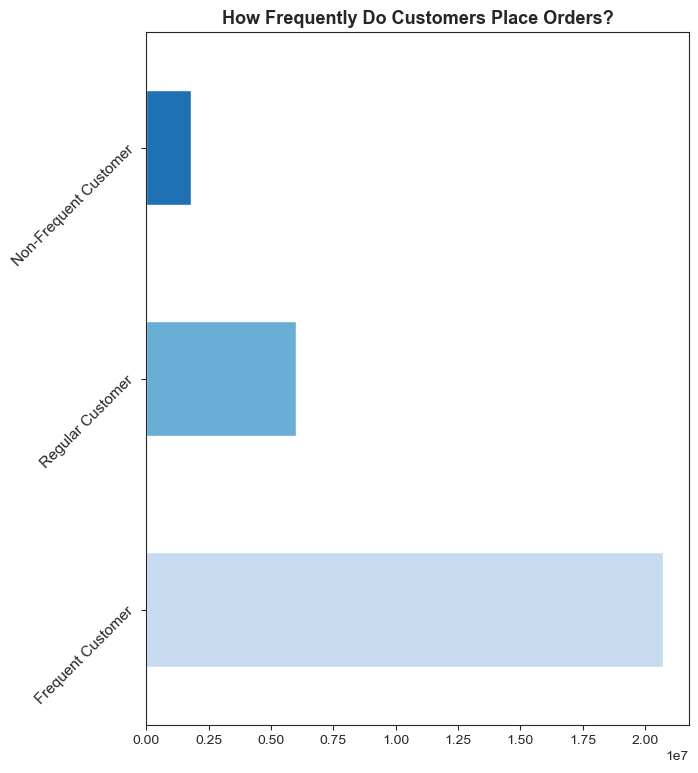

In [170]:
##56 Creating a bar chart of how frequently customers place orders
barfrequency = df_nolow_activity['frequency_of_customer'].value_counts().plot.barh(color = sns.color_palette('Blues', 3), figsize = (7,9))
sns.set_style('ticks')
plt.xlabel('', fontsize = 11)
plt.ylabel('', fontsize = 11)
plt.yticks(rotation=45, ha="right")
plt.yticks(fontsize = 11)
plt.title('How Frequently Do Customers Place Orders?', fontsize = 13, fontweight = 'bold')
plt.show()

In [171]:
##57 Exporting viz
barfrequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barfrequency.png'))

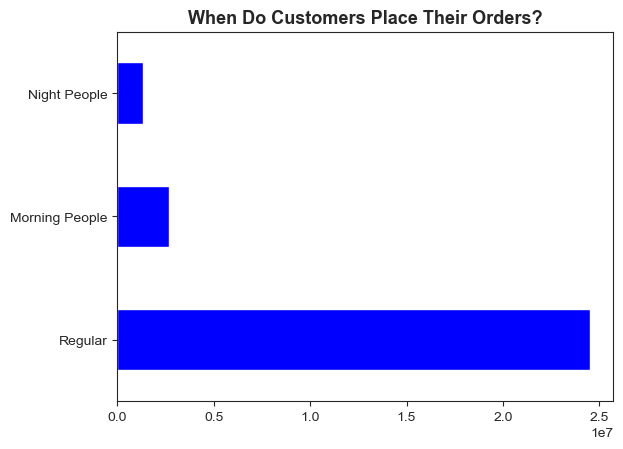

In [172]:
##58 Creating a bar chart of when customers place their orders
barWhendocustomersplacetheirorders = df_nolow_activity['Time Ordering'].value_counts().plot.barh(color = ['blue'])
plt.xlabel('')
plt.title('When Do Customers Place Their Orders?', fontsize = 13, fontweight = 'bold')
plt.show()

In [173]:
##59 Exporting viz
barWhendocustomersplacetheirorders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barWhendocustomersplacetheirorders.png'))

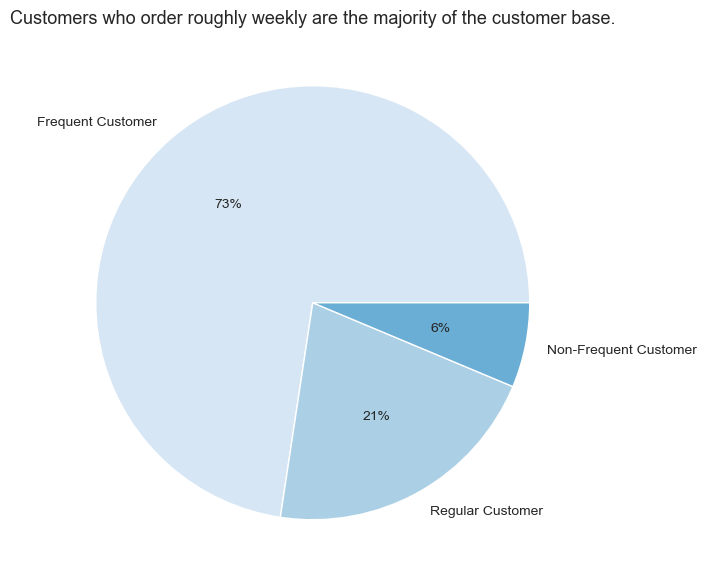

In [174]:
##60 Creating a pie chart of how frequently customers order
frequencypie = df_nolow_activity['frequency_of_customer'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Customers who order roughly weekly are the majority of the customer base.',fontsize=13)
plt.show()

In [175]:
##61 Exporting viz
frequencypie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequencypie.png'))

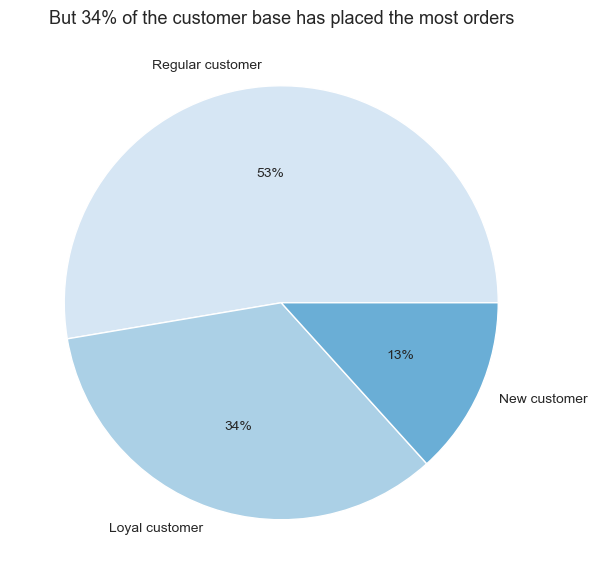

In [176]:
##62 Creating a pie chart of how orders customers have placed
loyaltypie = df_nolow_activity['loyalty_flag'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('But 34% of the customer base has placed the most orders',fontsize=13)
plt.show()

In [177]:
##63 Exporting viz
loyaltypie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyaltypie.png'))

In [ ]:
##64 Making a scatterplot of age and family status
scatterAgeandAnnualIncome = sns.scatterplot(x = 'Age', y = 'family_status',data = df_nolow_activity)
sns.set_style('ticks')
plt.xlabel('Customer Age', fontsize = 11)
plt.ylabel('', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Customers by Age and Family Status', fontsize = 13, fontweight = 'bold')
plt.show()

In [ ]:
##65 Exporting viz
scatterAgeandAnnualIncome.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterAgeandAnnualIncome.png'))

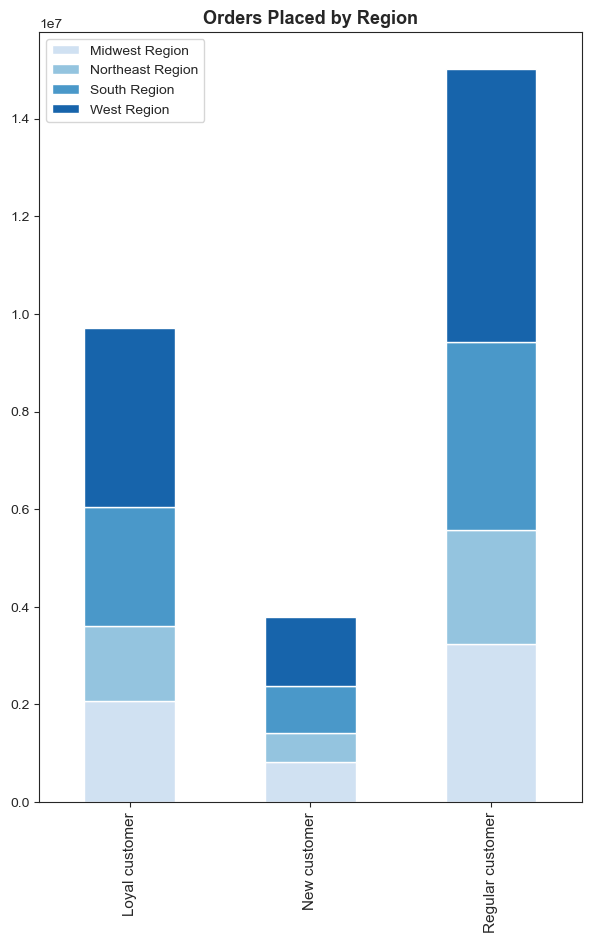

In [180]:
##66 Creating a stacked bar chart of how many orders placed, by region
region_loyalty = crosstab_region_loyalty.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 4), figsize = (7,10))
plt.legend(loc='upper left')
plt.xlabel('', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 11)
plt.ylabel('', fontsize = 13, fontweight = 'bold')
plt.title('Orders Placed by Region', fontsize = 13, fontweight = 'bold')
plt.show()

In [181]:
##67 Exporting viz
region_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_loyalty.png'))

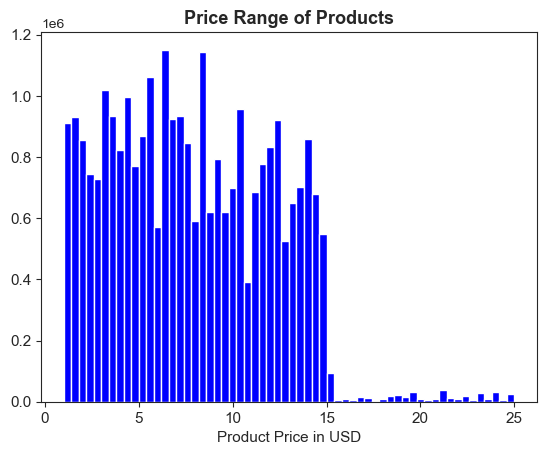

In [183]:
##68 Making a histogram with 60 bins, of the price range of products
pricerangehist = df_nolow_activity['prices'].plot.hist(bins = 60, color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Product Price in USD', fontsize = 11)
plt.ylabel('', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Price Range of Products', fontsize = 13, fontweight = 'bold')
plt.show()

In [184]:
##69
pricerangehist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pricerangehist.png'))

In [185]:
##70 Steps 1 of 3 to make a representative subset small enough to work with on computer, based on "4" and using 70/30
np.random.seed(4)
dev = np.random.rand(len(df_nolow_activity)) <= 0.7

In [186]:
##71 Steps 2 of 3 to make the subset, naming the 70% "big"
big = df_nolow_activity[dev]

In [187]:
##72 Steps 3 of 3 to make the subset, naming the 30% "small"
small = df_nolow_activity[~dev]

In [188]:
##73 Final part of creating subset small enough to make visuals with, creating "df_2" 
## with just two columns needed for a line chart
df_2 = small[['time_order_placed','mean_order']]

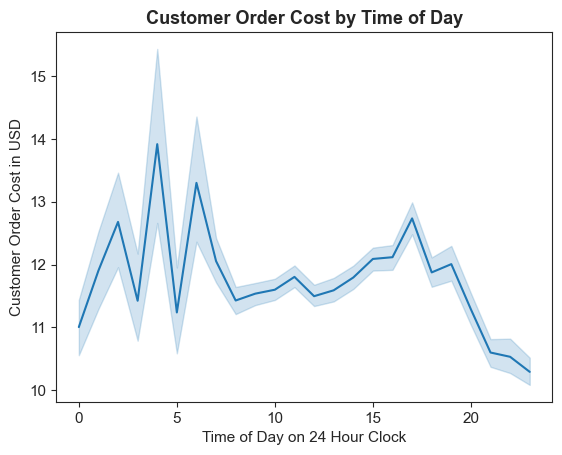

In [189]:
##74 Creating a line chart showing the cost of average customer orders by time of day
lineCustomerOrderCostbyTimeofDay = sns.lineplot(data = df_2, x = 'time_order_placed',y = 'mean_order')
sns.set_style('ticks')
plt.xlabel('Time of Day on 24 Hour Clock', fontsize = 11)
plt.ylabel('Customer Order Cost in USD', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Customer Order Cost by Time of Day', fontsize = 13, fontweight = 'bold')
plt.show()

In [190]:
##75 Creating "df_3" with just two columns needed for a line chart
df_3 = small[['Age','family_status']]

In [191]:
##76 Creating "df_4" with just two columns needed for a line chart
df_4 = small[['time_order_placed','prices']]

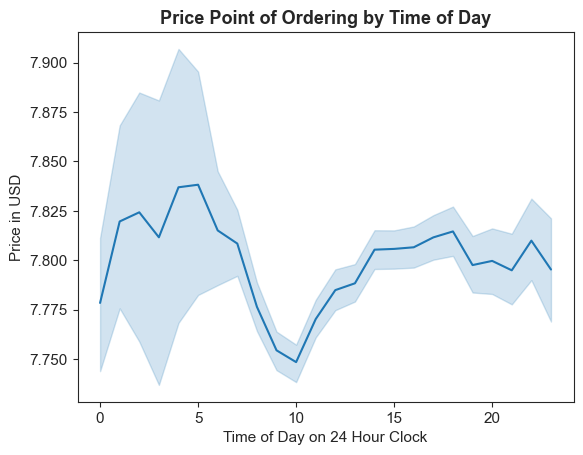

In [192]:
##77 Creating a linechart with subset, showing prices by time of order
linePricePointofOrderingbyTimeofDay = sns.lineplot(data = df_4, x = 'time_order_placed',y = 'prices')
sns.set_style('ticks')
plt.xlabel('Time of Day on 24 Hour Clock', fontsize = 11)
plt.ylabel('Price in USD', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Price Point of Ordering by Time of Day', fontsize = 13, fontweight = 'bold')
plt.show()

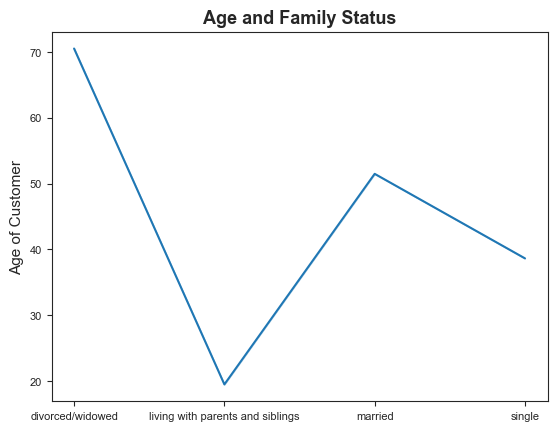

In [193]:
##78 Creating a linechart with subset showing age and marital status
lineage_status = sns.lineplot(data = df_3, x = 'family_status',y = 'Age')
sns.set_style('ticks')
plt.xlabel('', fontsize = 8)
plt.ylabel('Age of Customer', fontsize = 11)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Age and Family Status', fontsize = 13, fontweight = 'bold')
plt.show()

In [194]:
##79 Exporting viz
lineCustomerOrderCostbyTimeofDay.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineCustomerOrderCostbyTimeofDay.png'))

In [195]:
##80 Exporting viz
linePricePointofOrderingbyTimeofDay.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linePricePointofOrderingbyTimeofDay.png'))

In [196]:
##81 Exporting viz
lineage_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineage_status.png'))

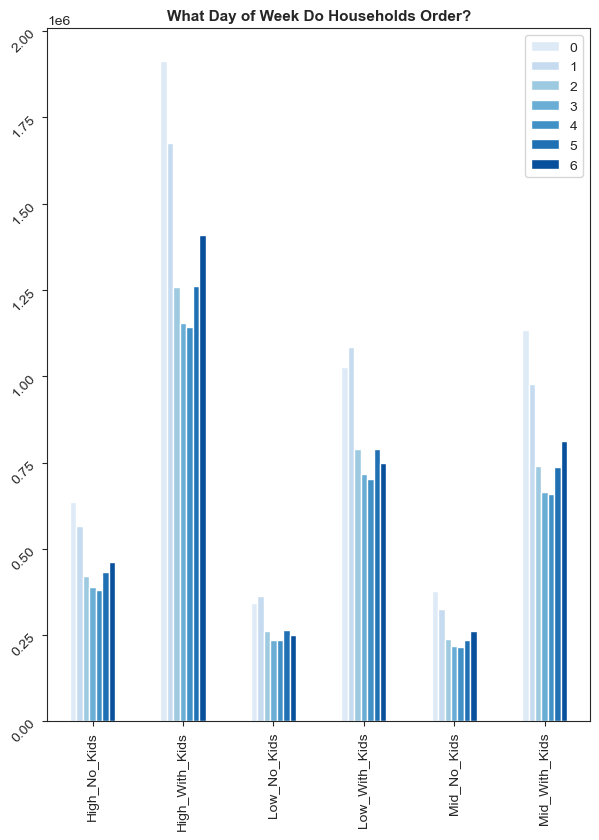

In [197]:
##82 Creating an unstacked bar chart showing what day of the week households order, by demographics (income and whether children are present)
householdkind_dayofweek = crosstab_householdkind_dayofweek.plot.bar (color = sns.color_palette('Blues', 7), figsize = (7,9))
plt.legend(loc='upper right')
plt.xlabel('', fontsize = 11, fontweight = 'bold')
plt.yticks(rotation=45, ha="right")
plt.ylabel('', fontsize = 11, fontweight = 'bold')
plt.title('What Day of Week Do Households Order?', fontsize = 11, fontweight = 'bold')
plt.show()

In [198]:
##83 Exporting viz
householdkind_dayofweek.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'householdkind_dayofweek.png'))

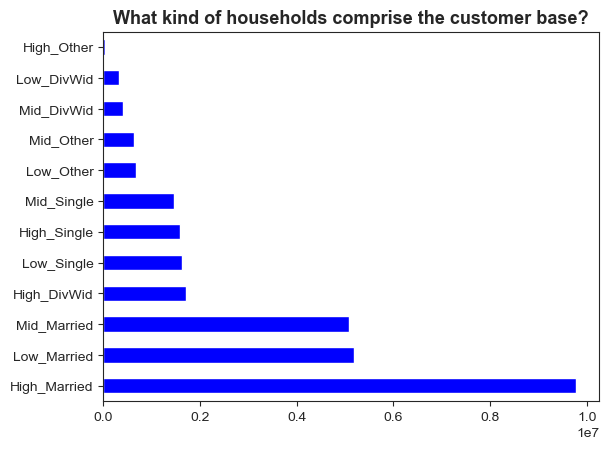

In [199]:
##84 Creating a bar chart of customer demographics (income and whether children are present)
barhouseholdstatusbudget = df_nolow_activity['Household_Status_Budget'].value_counts().plot.barh(color = ['blue'])
plt.xlabel('')
plt.title('What kind of households comprise the customer base?', fontsize = 13, fontweight = 'bold')
plt.show()

In [200]:
##85 Exporting viz
barhouseholdstatusbudget.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barhouseholdstatusbudget.png'))

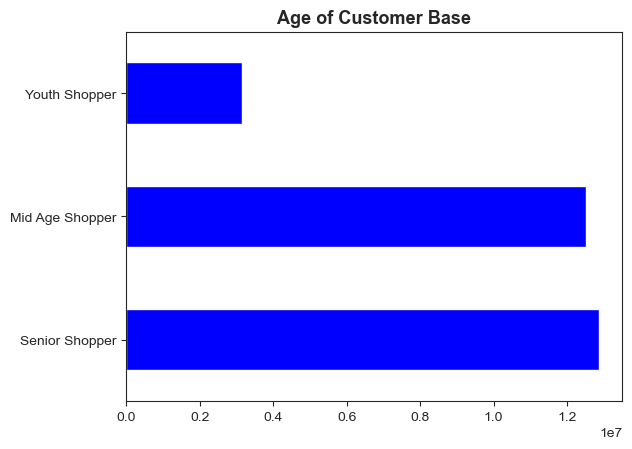

In [201]:
##86 Creating a bar chart showing the age groups of customer base
barlifestage = df_nolow_activity['Lifestage'].value_counts().plot.barh(color = ['blue'])
plt.xlabel('')
plt.title('Age of Customer Base', fontsize = 13, fontweight = 'bold')
plt.show()

In [202]:
##87 Exporting viz
barlifestage.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barlifestage.png'))

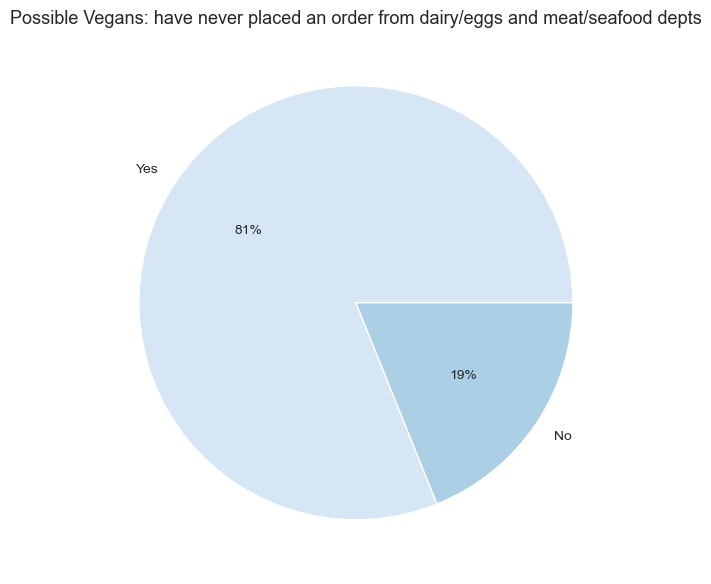

In [205]:
##88 Creating a pie chart showing customers based on their dept ordering habits (possible vegans)
veganpie = df_nolow_activity['Possible Vegan'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Possible Vegans: have never placed an order from dairy/eggs and meat/seafood depts',fontsize=13)
plt.show()

In [206]:
##89 Exporting viz
veganpie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'veganpie.png'))

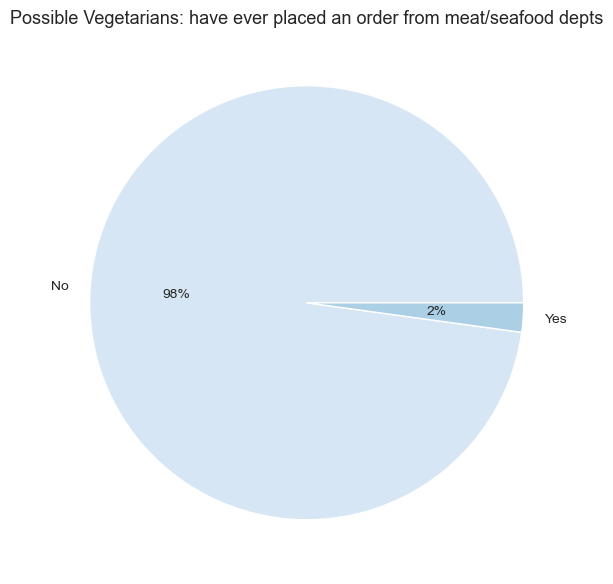

In [210]:
##90 Creating a pie chart of whether customers have ever ordered form meat/seafood dept
meatpie = df_nolow_activity['Meat Buyer'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Possible Vegetarians: have ever placed an order from meat/seafood depts',fontsize=13)
plt.show()

In [211]:
##91 Exporting viz
meatpie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'meatpie.png'))

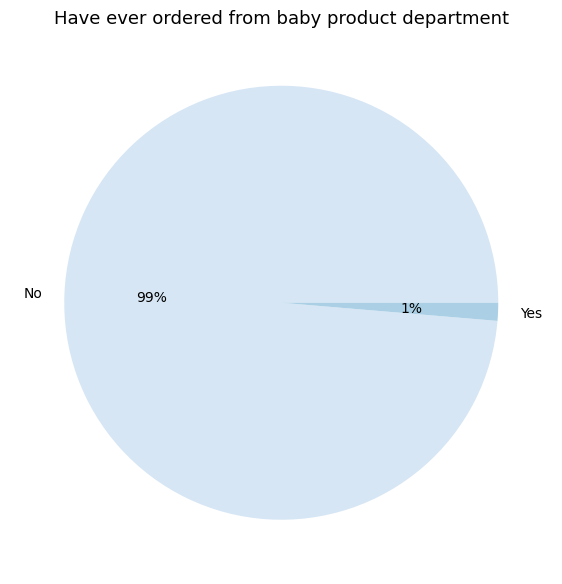

In [6]:
##92 Creating a pie chart of whether customers have ordered from baby product department
babypie = df_nolow_activity['Baby Item Buyer'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Have ever ordered from baby product department',fontsize=13)
plt.show()

In [7]:
##93 Exporting viz
babypie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babypie.png'))

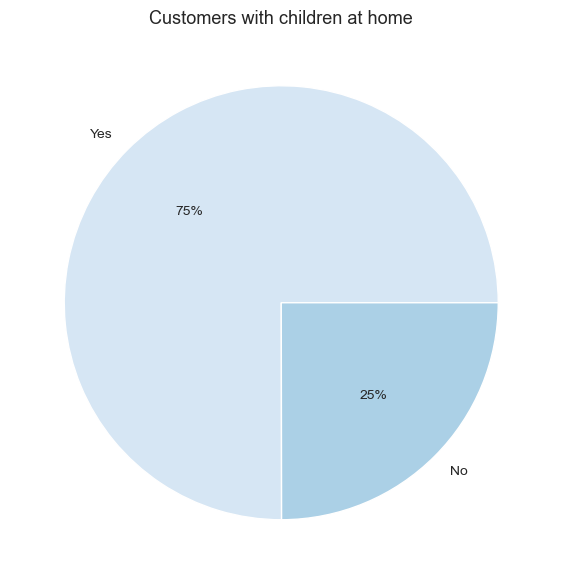

In [214]:
##94 Creating a pie chart of whether customers have children at home
kidspie = df_nolow_activity['Status_Kids'].value_counts().plot.pie(figsize = (7,8), colors = sns.color_palette('Blues', 5), autopct = '%1.0f%%')
plt.ylabel('')
plt.title('Customers with children at home',fontsize=13)
plt.show()

In [215]:
##95 Exporting viz
kidspie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'kidspie.png'))

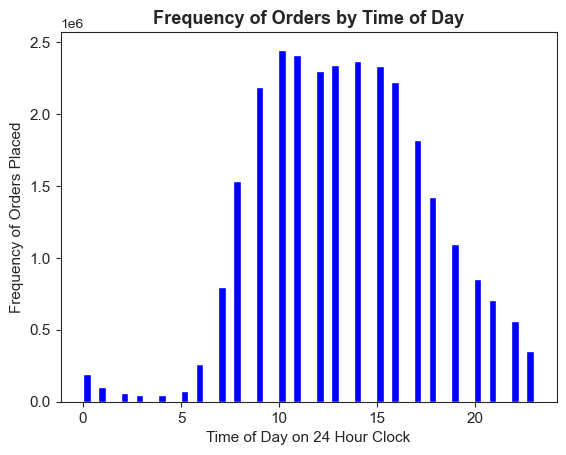

In [69]:
##96 Making a histogram with 60 bins, showing the frequency of orders by time of day
histFrequencyofOrdersbyTimeofDay = df_nolow_activity['time_order_placed'].plot.hist(bins = 60, color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Time of Day on 24 Hour Clock', fontsize = 11)
plt.ylabel('Frequency of Orders Placed', fontsize = 11)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Frequency of Orders by Time of Day', fontsize = 13, fontweight = 'bold')
plt.show()

In [216]:
##97 Exporting viz
histFrequencyofOrdersbyTimeofDay.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histFrequencyofOrdersbyTimeofDay.png'))

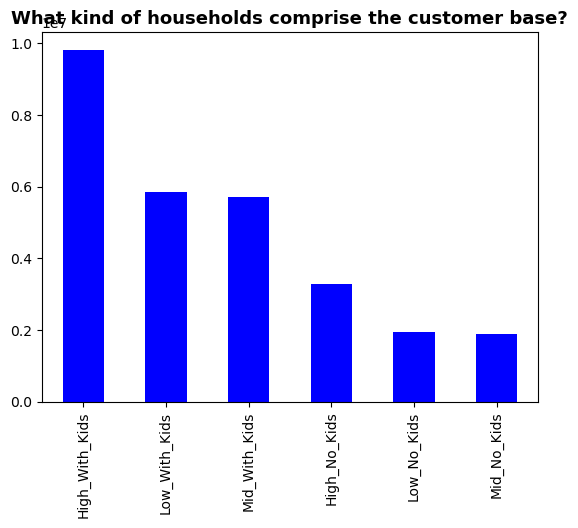

In [13]:
##98 Creating a bar chart of customer demographics (income and whether children are present)
barhouseholdkindbudget = df_nolow_activity['Household_Kind_Budget'].value_counts().plot.bar(color = ['blue'])
plt.xlabel('')
plt.title('What kind of households comprise the customer base?', fontsize = 13, fontweight = 'bold')
plt.show()

In [14]:
##99 Exporting viz
barhouseholdkindbudget.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barhouseholdkindbudget.png'))